# "Cool Softplus Function Properties"
> "The y-intercept of the tangent of a softplus function is the entropy of a Bernoulli distribution with probability equal to its slope"

- toc: true
- branch: master
- badges: false
- comments: false
- categories: [probability]
- hide: false
- search_exclude: false
- image: images/blog_posts/cool_softplus.png
- redirect_from: blog/cool_softplus

## The Special Case, the Bernoulli Distribution

Suppose $\eta$ is the log odds, $\log\left(\frac{p}{1-p}\right)$ of some event that occurs with probability p, i.e., of a Bernoulli random variable with parameter $p$.

The local linearization of the softplus function, $s(\eta) = \log(1+\exp\eta)$ at any given value for $\eta$ has the following interesting properties:
- its slope is the corresponding probability $p$.
- its y-intercept is the entropy of the Bernoulli distribution that has probability $p$.



The first is true because $s^{\prime}(\eta) = \frac{1}{1 + \exp(-\eta)}$, the logistic sigmoid (inverse-log-odds) function.

The second can be found be found by expressing the entropy in terms of the log-odds:
\begin{align}
-p\log p - (1-p)\log (1-p) 
&= -p (\log p - \log (1-p)) - \log (1-p) \\
&= -p (\log \frac{p}{1-p}) - \log (1-p) \\
&= s(\eta) - s^{\prime}(\eta)\cdot \eta \quad .
\end{align}

## Plots

The following plots show the entropy, via the y-intercept of the linearization of the softplus function, of 5 Bernoulli distributions.

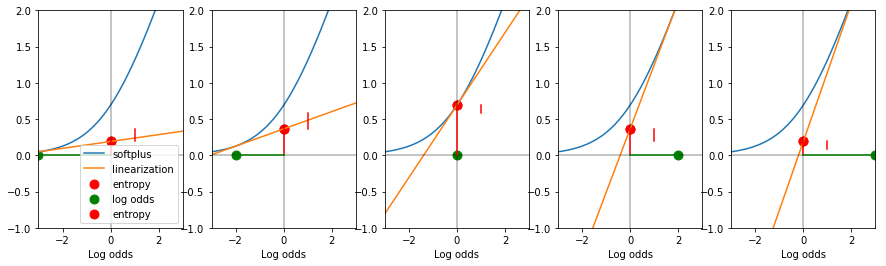

In [23]:
import matplotlib.pyplot as plt
import numpy as np

def softplus(eta):
    return np.log(1 + np.exp(eta))

def sigmoid(eta):
    return 1 / (1 + np.exp(-eta))

xs = np.linspace(-3, 3, 50)
etas = [-3, -2, 0.0, 2, 3]

fig, axes = plt.subplots(1, len(etas), figsize=(15, 4))
for plot_i, (eta, ax) in enumerate(zip(etas, axes)):
    ax.plot(xs, softplus(xs), label='softplus', c='C0')
    ax.plot(xs, sigmoid(eta) * xs + softplus(eta) - sigmoid(eta) * eta, label='linearization', c='C1')
    ax.axvline(x=0.0, c='k', alpha=0.3)
    ax.axhline(y=0.0, c='k', alpha=0.3)
    ax.axvline(x=0.0, ymin=0.3333, ymax=(softplus(eta) - sigmoid(eta) * eta + 1)/3, c='r')
    ax.scatter([0], [softplus(eta) - sigmoid(eta) * eta], c='r', s=80, label='entropy')
    ax.axhline(y=0.0, xmin=0.5, xmax=(eta + 3)/6, c='g')
    ax.scatter([eta], [0], c='g', s=80, label='log odds')
    ax.axvline(x=1.0, ymin=(softplus(eta) - sigmoid(eta) * eta + 1)/3, ymax=(softplus(eta + 1) - sigmoid(eta + 1) * (eta + 1) + 1)/3, c='r')
    ax.scatter([0], [softplus(eta) - sigmoid(eta) * eta], c='r', s=80, label='entropy')
    ax.set_xlim((-3, 3))
    ax.set_ylim((-1, 2))
    ax.set_xlabel('Log odds')
    if plot_i == 0:
        ax.legend()

## The General Case, Exponential Families

More generally, consider an [exponential family](https://en.wikipedia.org/wiki/Exponential_family). This is a parameterized distribution of the form:

$$ p(x; \eta) = \exp\left( \eta\cdot T(x) + k(x) - A(\eta) \right) \quad . $$

Here, $\eta$ is a vector of parameters, $T(x)$ is a vector of *sufficient statistics* for the distribution, $k(x)$ is called the carrier measure, and $A(\eta)$ is a normalizer that makes the distribution integrate to 1.

For some popular distributions the carrier measure is zero. This is true of the Gaussian distribution and the Bernoulli distribution. Then we have

$$ p(x; \eta) = \exp\left( \eta\cdot T(x) - A(\eta) \right) \quad , $$

and the entropy of the distribution is given by

\begin{align}
H(p) &= A(\eta) \int p(x; \eta) \text{dx} - \eta \int T(x) p(x; \eta) \text{dx} \\
&= A(\eta) - \eta \cdot \mathbb{E}_p\left[ T(x) \right] \quad .
\end{align}

One useful property of exponential families is that the gradient of the log normalizer $A$ is equal to the expected value of the sufficient statistics: $\mathbb{E}_p\left[ T(x) \right] = \nabla A(\eta)$, so the entropy is equal to:

\begin{align}
H(p) = A(\eta) - \eta \cdot \nabla A(\eta) \quad .
\end{align}

This means that if we locally linearize, at some value of the parameters $\eta$, the log normalizing function $A$ of an exponential family with carrier measure zero, the resulting hyperplane has slope equal to the expected value (with respect to the distribution) of the sufficient statistics, and has a y-intercept equal to the entropy of the distribution.